# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [23]:
# importando as bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Carregando os dados
df = pd.read_csv('demo01.csv')

In [25]:
# Verificando algumas informações sobre a base de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [26]:
# Verificando a quantidade de dados faltantes
df.isna().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

Não há dados faltantes

In [27]:
# Contando a quantidade de mau
df['mau'].value_counts()

False    16260
True       390
Name: mau, dtype: int64

In [28]:
# Verificando a proporção de cada valor
df['mau'].value_counts(normalize=True)

False    0.976577
True     0.023423
Name: mau, dtype: float64

<Axes: xlabel='mau', ylabel='count'>

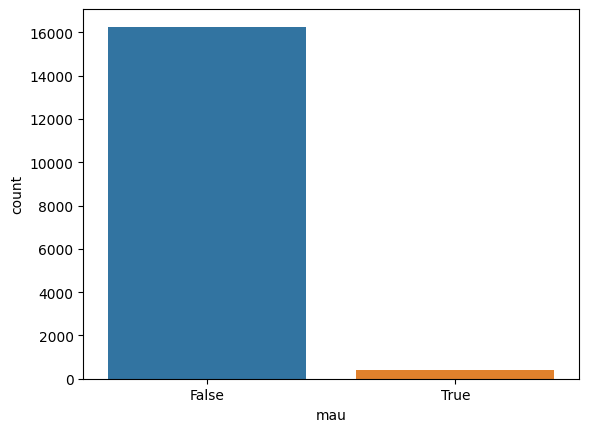

In [29]:
# Criando o gráfico de barras
sns.countplot(data=df, x='mau')

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável.
    Dica:
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis,
        3. conte o número de categorias dessa variável
        4. acumule essa informação de 3. na lista que você criou em 1.
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [30]:
# Criando o dataframe com os nomes das variáveis e o tipo dos dados
# Obtendo os nomes das variáveis (colunas) e seus tipos de dados
col_names = df.columns.tolist()
col_types = df.dtypes.tolist()

In [31]:
# Calculando o número de categorias para cada variável
qtd_categorias = [len(df[col].unique()) for col in col_names]
qtd_categorias

[2, 2, 2, 8, 5, 5, 5, 6, 5298, 3005, 1, 2, 2, 2, 9, 2]

In [32]:
# Criando um DataFrame com as informações
info_df = pd.DataFrame({
    'Variável': col_names,
    'Tipo de Dados': col_types,
    'qtd_categorias': qtd_categorias
})
info_df

,Variável,Tipo de Dados,qtd_categorias
0,sexo,object,2
1,posse_de_veiculo,object,2
2,posse_de_imovel,object,2
3,qtd_filhos,int64,8
4,tipo_renda,object,5
5,educacao,object,5
6,estado_civil,object,5
7,tipo_residencia,object,6
8,idade,float64,5298
9,tempo_emprego,float64,3005


In [33]:
# Identificando as variáveis qualitativas
qualitative_vars = info_df[info_df['Tipo de Dados'].apply(lambda x: x not in [np.number, np.bool])]['Variável']


<ipython-input-33-3b71b6ee1c4b>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  qualitative_vars = info_df[info_df['Tipo de Dados'].apply(lambda x: x not in [np.number, np.bool])]['Variável']
<ipython-input-33-3b71b6ee1c4b>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  qualitative_vars = info_df[info_df['Tipo de Dados'].apply(lambda x: x not in [np.number, np.bool])]['Variável']


In [34]:
# Criando variáveis dummy para as variáveis qualitativas
dummy_vars = pd.get_dummies(df[qualitative_vars])
dummy_vars.head()

,qtd_filhos,possui_celular,possui_fone_comercial,possui_fone,possui_email,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,1,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,1,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,1,1,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0


In [35]:

# Adicionando as variáveis dummy ao DataFrame original
df = pd.concat([df, dummy_vars], axis=1)

In [36]:
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau',
       'qtd_filhos', 'possui_celular', 'possui_fone_comercial', 'possui_fone',
       'possui_email', 'sexo_F', 'sexo_M', 'posse_de_veiculo_N',
       'posse_de_veiculo_Y', 'posse_de_imovel_N', 'posse_de_imovel_Y',
       'tipo_renda_Commercial associate', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Academic degree', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Civil marriage',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_Co

#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [37]:
# Variável contendo apenas versão dummy
dummy_vars.head()

,qtd_filhos,possui_celular,possui_fone_comercial,possui_fone,possui_email,sexo_F,sexo_M,posse_de_veiculo_N,posse_de_veiculo_Y,posse_de_imovel_N,...,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
1,0,1,0,1,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,1,1,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,1,1,1,1,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,1,0,0,1,1,...,1,0,0,0,0,1,0,0,0,0


In [38]:
# Verificando se todas as colunas possuem apenas dois valores
col_names = dummy_vars.columns.tolist()
qtd_categorias = [len(dummy_vars[col].unique()) for col in col_names]
qtd_categorias

[8,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [39]:
# Removendo a coluna qtd_filhos por possuir muitos valores
dummy_vars = dummy_vars.drop('qtd_filhos', axis=1)
dummy_vars.columns

Index(['possui_celular', 'possui_fone_comercial', 'possui_fone',
       'possui_email', 'sexo_F', 'sexo_M', 'posse_de_veiculo_N',
       'posse_de_veiculo_Y', 'posse_de_imovel_N', 'posse_de_imovel_Y',
       'tipo_renda_Commercial associate', 'tipo_renda_Pensioner',
       'tipo_renda_State servant', 'tipo_renda_Student', 'tipo_renda_Working',
       'educacao_Academic degree', 'educacao_Higher education',
       'educacao_Incomplete higher', 'educacao_Lower secondary',
       'educacao_Secondary / secondary special', 'estado_civil_Civil marriage',
       'estado_civil_Married', 'estado_civil_Separated',
       'estado_civil_Single / not married', 'estado_civil_Widow',
       'tipo_residencia_Co-op apartment', 'tipo_residencia_House / apartment',
       'tipo_residencia_Municipal apartment',
       'tipo_residencia_Office apartment', 'tipo_residencia_Rented apartment',
       'tipo_residencia_With parents'],
      dtype='object')

#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [40]:
pd.crosstab(dummy_vars['possui_email'], dummy_vars['posse_de_veiculo_Y'])

posse_de_veiculo_Y,0,1
possui_email,,
0,9341,5829
1,837,643


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [45]:
dummy_vars = dummy_vars.join(df['mau'])

In [48]:
dummy_vars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 32 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   possui_celular                          16650 non-null  int64
 1   possui_fone_comercial                   16650 non-null  int64
 2   possui_fone                             16650 non-null  int64
 3   possui_email                            16650 non-null  int64
 4   sexo_F                                  16650 non-null  uint8
 5   sexo_M                                  16650 non-null  uint8
 6   posse_de_veiculo_N                      16650 non-null  uint8
 7   posse_de_veiculo_Y                      16650 non-null  uint8
 8   posse_de_imovel_N                       16650 non-null  uint8
 9   posse_de_imovel_Y                       16650 non-null  uint8
 10  tipo_renda_Commercial associate         16650 non-null  uint8
 11  tipo_renda_Pens

In [49]:
dummy_vars.to_csv('variaveis_dummy.csv', index=False)